## Conditional Spectrum (CS) Based Record Selection for Multiple-Stripe Analysis (MSA) Upon Carrying out Probabilistic Seismic Hazard Analysis (PSHA) via OpenQuake
Created on: 26/08/2021

Updated on: 21/10/2022

Author: Volkan Ozsarac

Affiliation: University School for Advanced Studies IUSS Pavia

Earthquake Engineering PhD Candidate

email:  volkan.ozsarac@iusspavia.it

In [1]:
from EzGM.selection import conditional_spectrum
from EzGM.utility import run_time, create_dir, hazard_curve, disagg_MR, disagg_MReps, check_gmpe_attributes, get_esm_token
from time import time
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Acquire the run start time
start_time = time()

### 1) Perform PSHA via OpenQuake

In [3]:
# %% Hazard Analysis via OpenQuake
# Set path to OpenQuake model .ini file path
parent_path = os.path.dirname(os.path.realpath(""))
oq_model = os.path.join(parent_path,'input files','OQ_Model') # this is the folder where oq model is located
oq_ini = 'job.ini' # this is .ini file used to run hazard model via openquake

# Set command to call OpenQuake
oq = 'oq'

# Directory to place post-processing results
post_dir = 'OQproc_Outputs'

# Read .ini file for post-processing purposes
with open(os.path.join(oq_model,oq_ini)) as f:
    info = f.readlines()
    for line in info:
        if line.startswith('poes'):
            poes = [float(poe) for poe in
                    line.split('\n')[0].split('=')[1].split(',')]
        if line.startswith('export_dir'):
            results_dir = os.path.join(oq_model, line.split('\n')[0].split('=')[1].strip())
        if line.startswith('mag_bin_width'):
            exec(line.strip())
        if line.startswith('distance_bin_width'):
            exec(line.strip())
        if line.startswith('reference_vs30_value'):
            exec(line.strip())


# Create the export directory for analysis results
create_dir(results_dir)

# Create the directory for processed results
create_dir(post_dir)

# Run the analysis via system command
cwd = os.getcwd() # Current working directory
os.chdir(oq_model) # Change directory, head to OQ_model folder
os.system(oq + ' engine --run ' + oq_ini + ' --exports csv')
os.chdir(cwd) # go back to the previous working directory

### 2) Post-process PSHA results

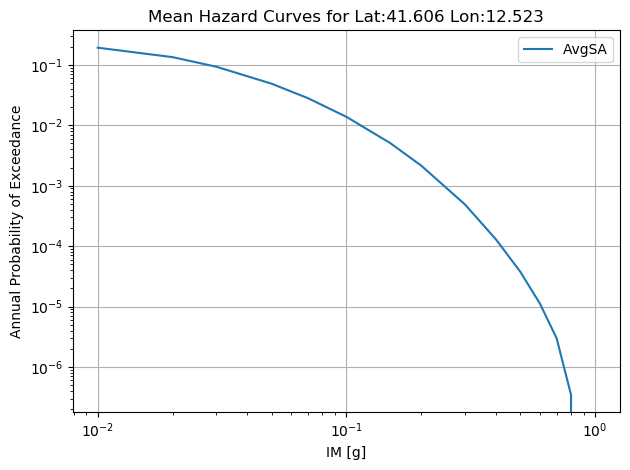

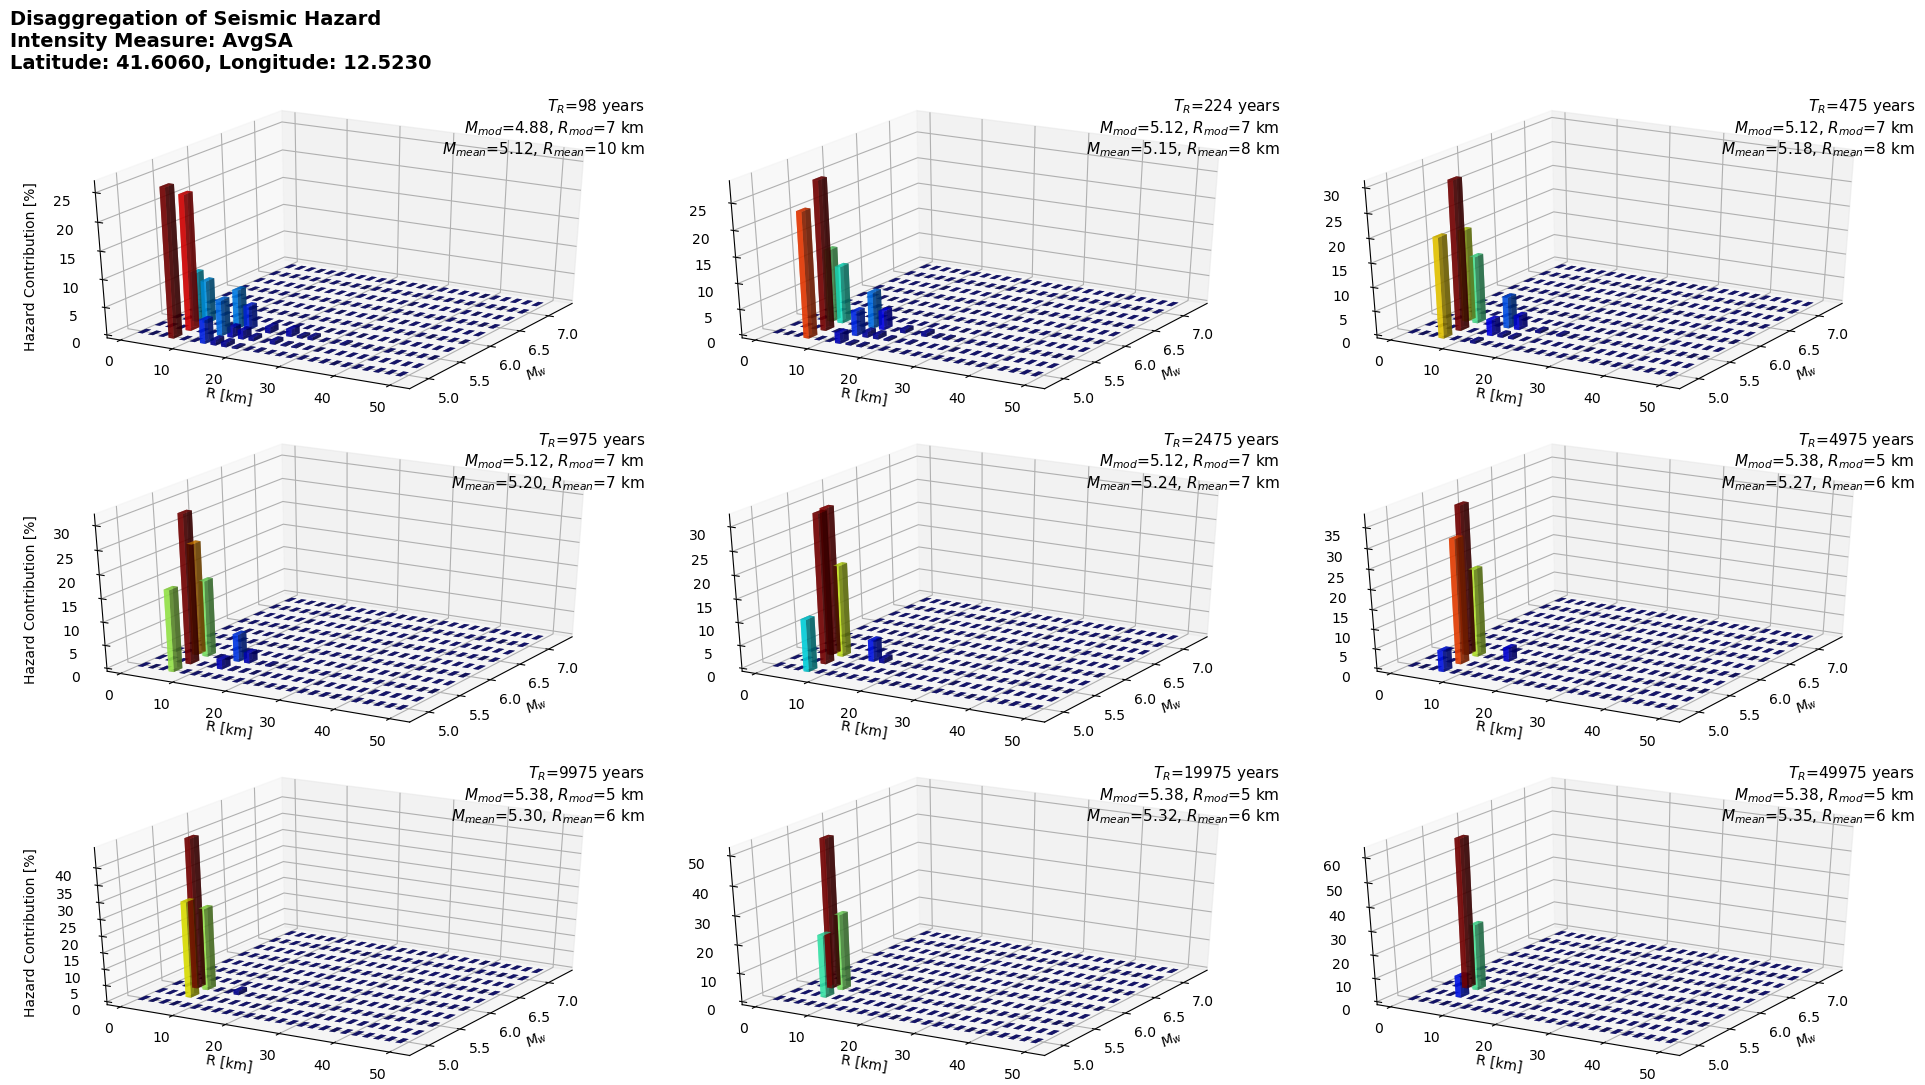

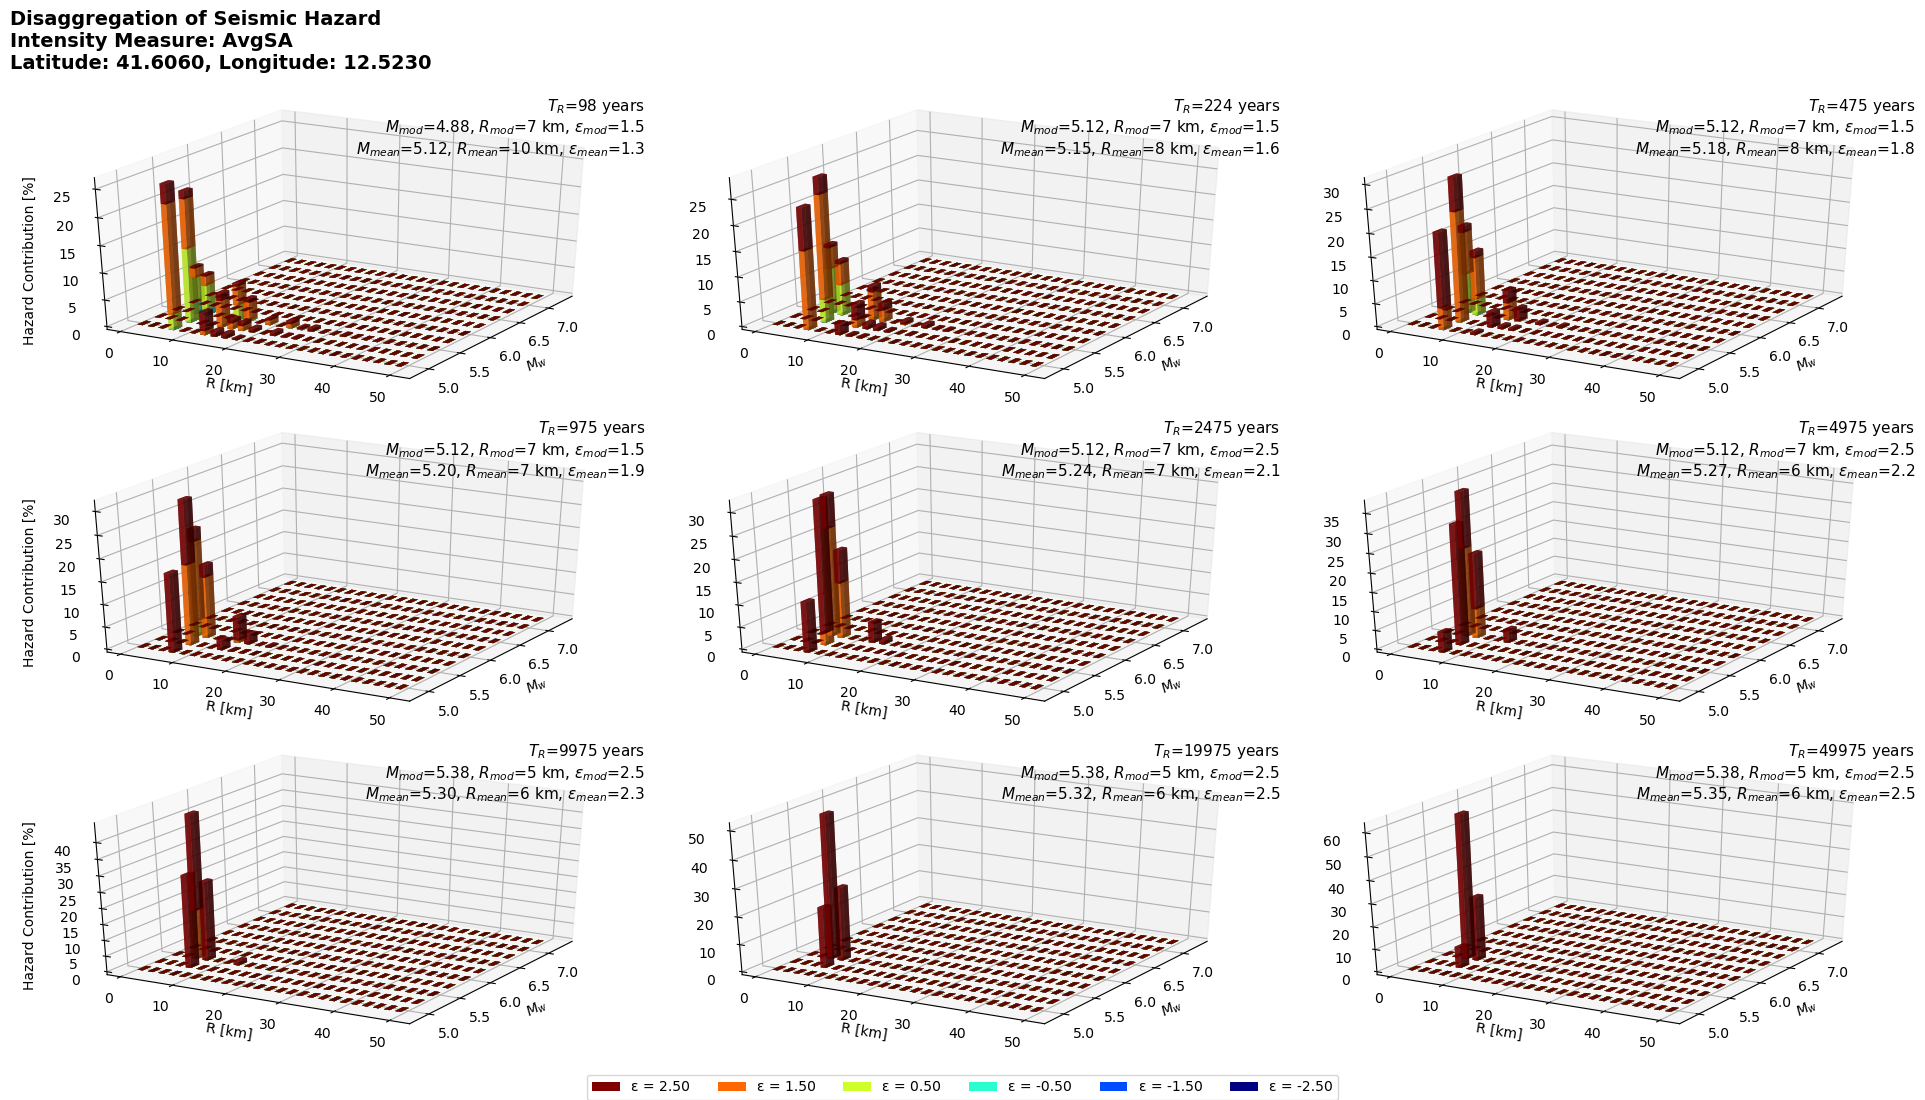

In [4]:
# Extract and plot hazard curves in a reasonable format
hazard_curve(poes, results_dir, post_dir)

# Extract and plot disaggregation results by M and R
disagg_MR(mag_bin_width, distance_bin_width, results_dir, post_dir, n_rows=3)

# Extract and plot disaggregation results by M, R and epsilon
disagg_MReps(mag_bin_width, distance_bin_width, results_dir, post_dir, n_rows=3)

### 3) Select the ground motions for different return periods, IM=AvgSA(T*)

GMPE name: BooreEtAl2014
Supported tectonic region: ACTIVE_SHALLOW_CRUST
Supported standard deviation: Total, Inter event, Intra event
Supported intensity measure: SA, PGA, PGV
Supported intensity measure component: RotD50
Supported SA period range: 0.01 - 10.0
Required distance parameters: rjb
Required rupture parameters: rake, mag
Required site parameters: vs30
Target spectrum is created.
Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 6.69 %
Max error in standard deviation = 7.40 %
The errors are within the target 10 percent %


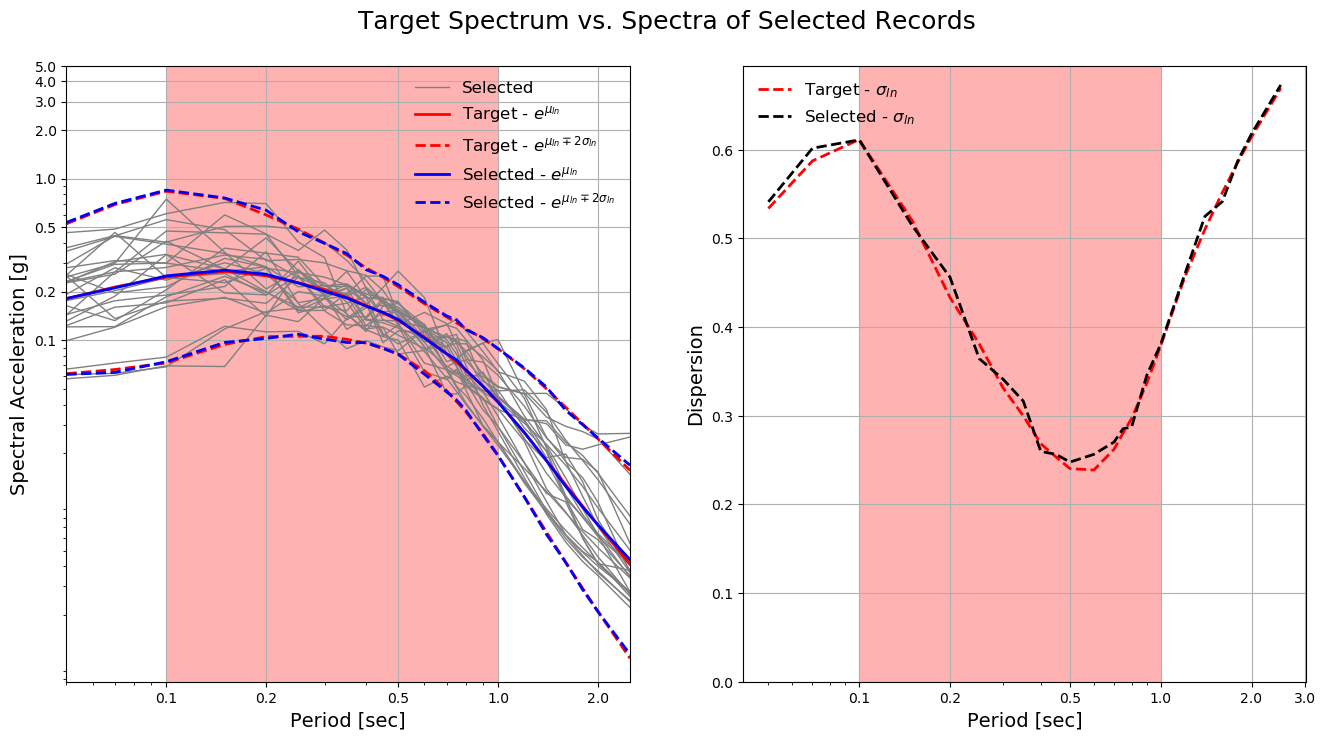


Started executing esm2018_download method...
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.4-in-50-years\unscaled_records_2022_10_21_9_17_31_4_294_0.zip
Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.4-in-50-years
Target spectrum is created.
Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 5.19 %
Max error in standard deviation = 6.58 %
The errors are within the target 10 percent %


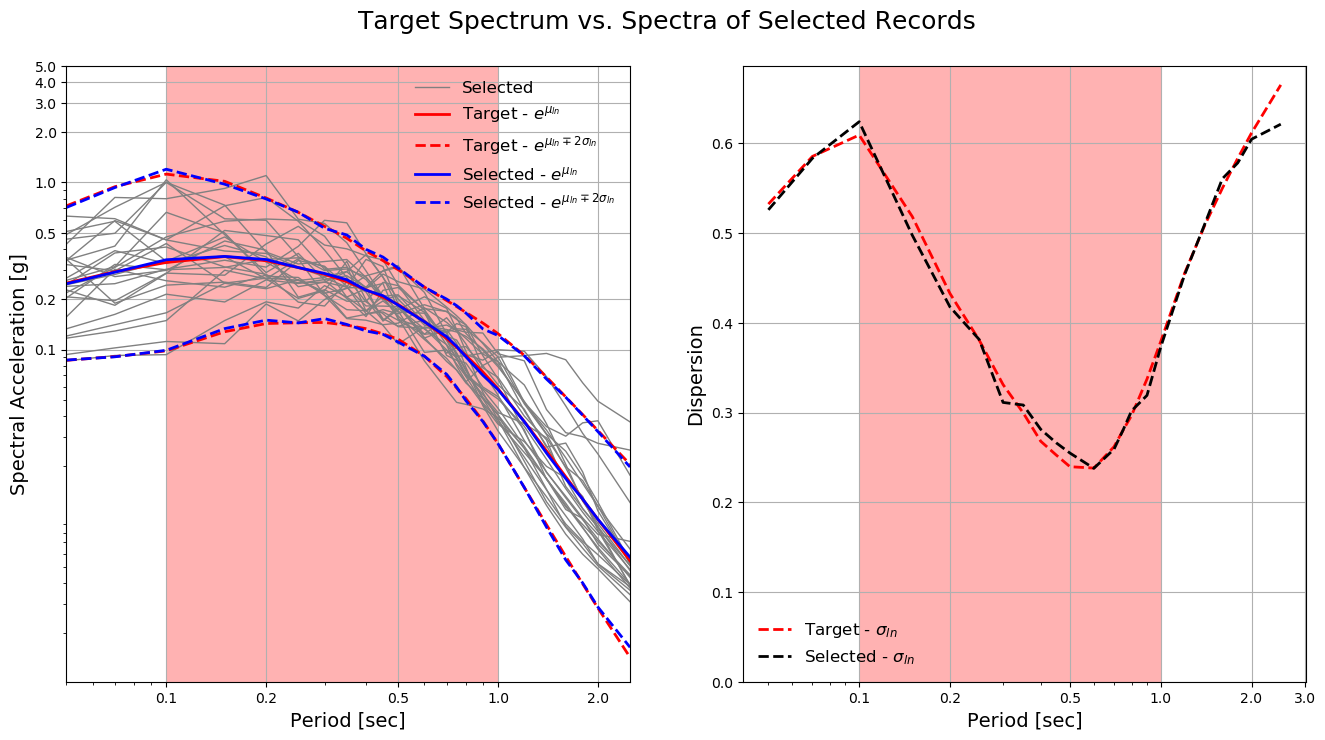


Started executing esm2018_download method...
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.2-in-50-years\unscaled_records_2022_10_21_9_18_11_4_294_0.zip
Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.2-in-50-years
Target spectrum is created.
Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 7.67 %
Max error in standard deviation = 9.33 %
The errors are within the target 10 percent %


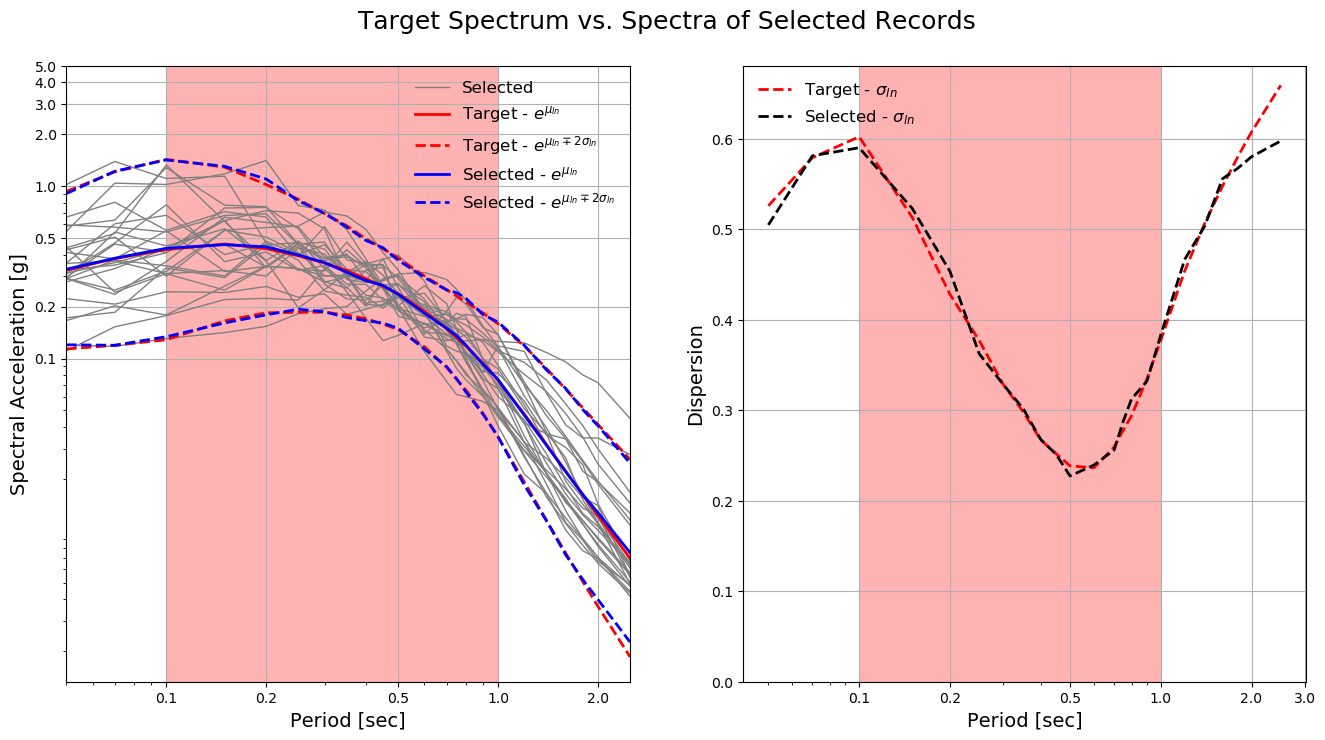


Started executing esm2018_download method...
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.1-in-50-years\unscaled_records_2022_10_21_9_18_52_4_294_0.zip
Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.1-in-50-years
Target spectrum is created.
Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 9.50 %
Max error in standard deviation = 9.58 %
The errors are within the target 10 percent %


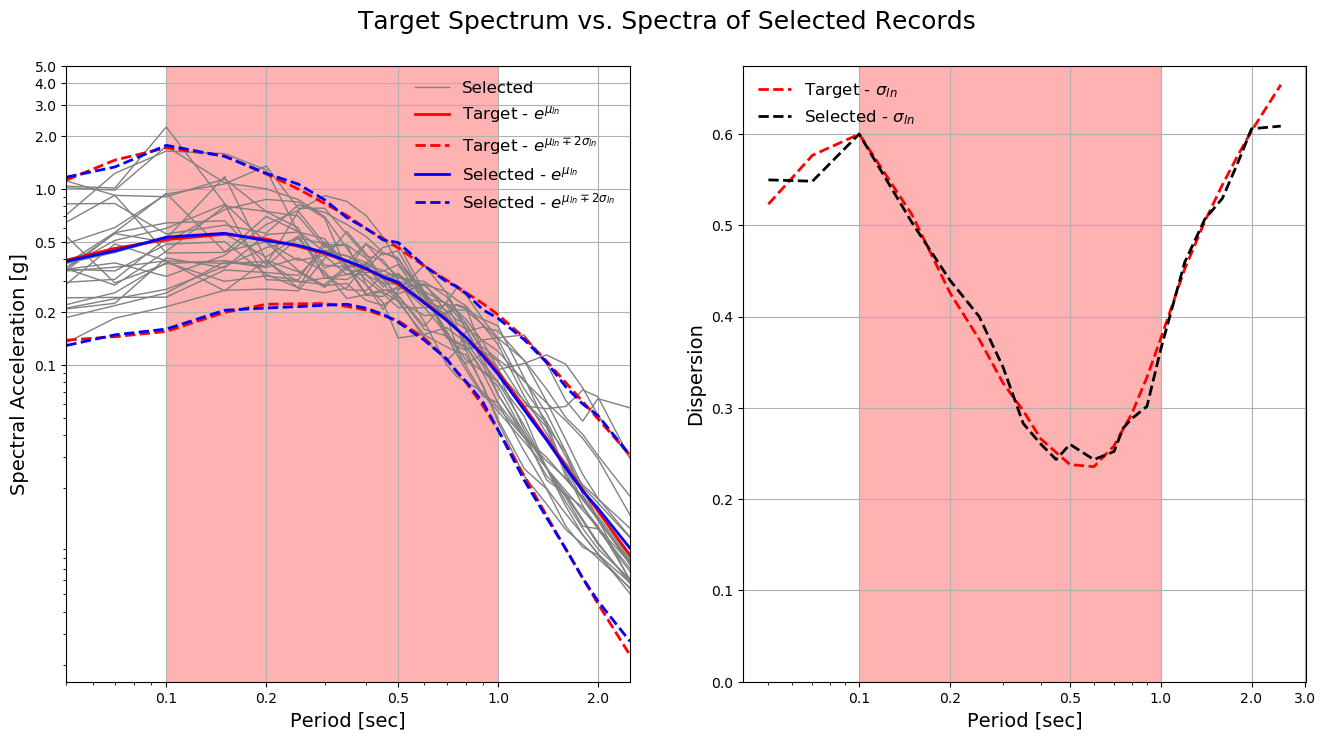


Started executing esm2018_download method...
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.05-in-50-years\unscaled_records_2022_10_21_9_19_32_4_294_0.zip
Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.05-in-50-years
Target spectrum is created.
Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 14.81 %
Max error in standard deviation = 9.45 %


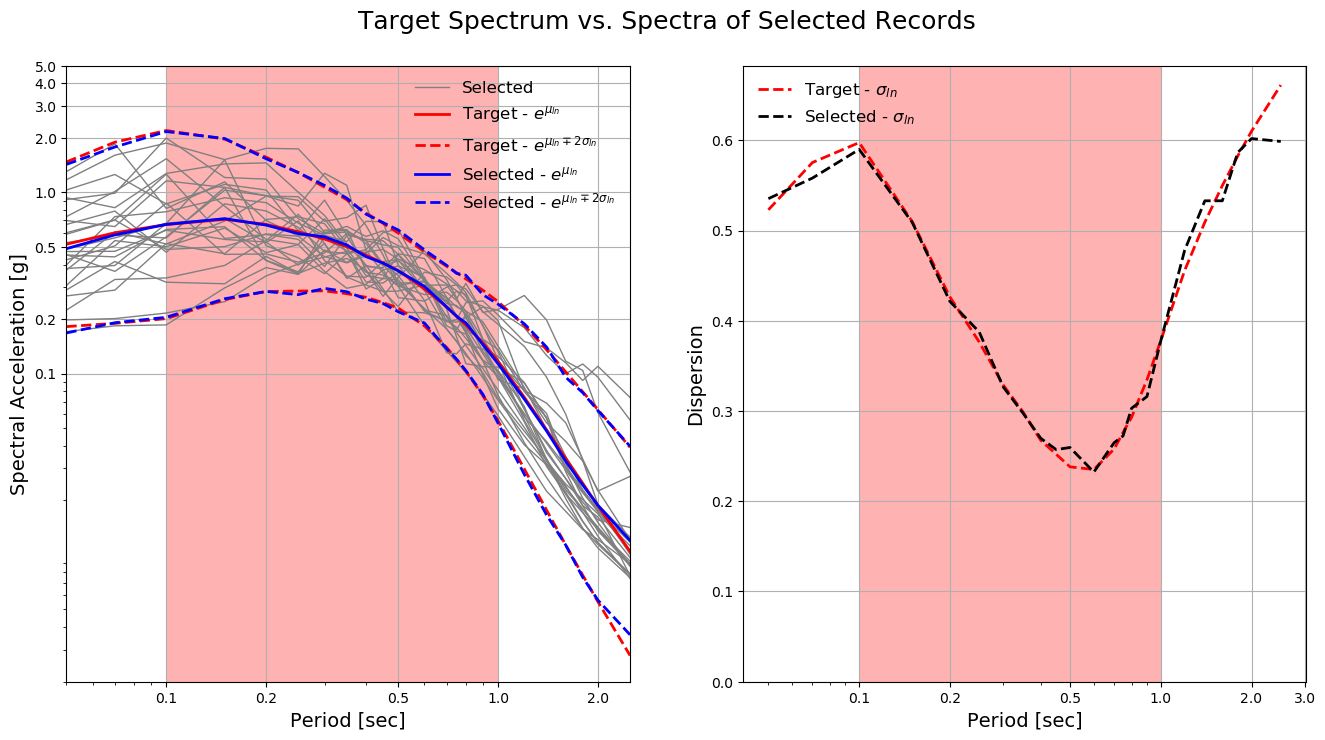


Started executing esm2018_download method...
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.02-in-50-years\unscaled_records_2022_10_21_9_20_16_4_294_0.zip
Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.02-in-50-years
Target spectrum is created.
Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 19.15 %
Max error in standard deviation = 9.49 %


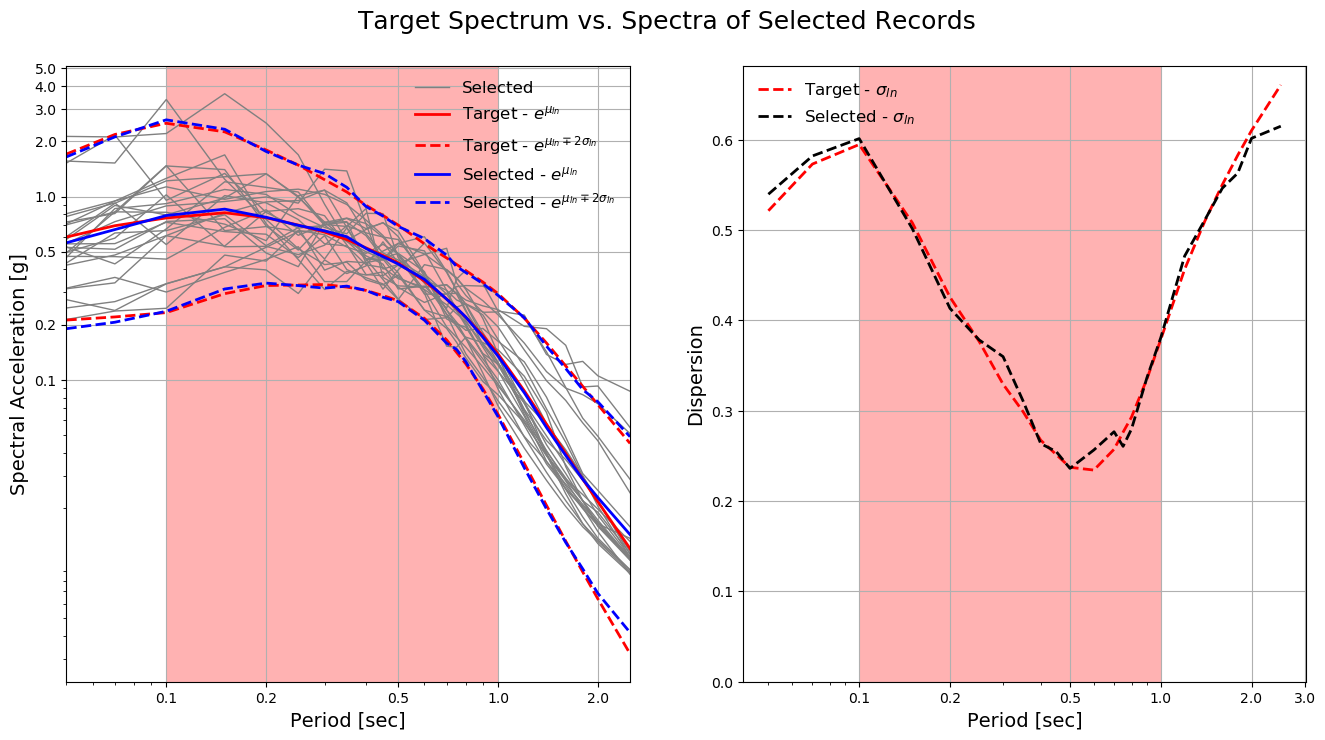


Started executing esm2018_download method...
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.01-in-50-years\unscaled_records_2022_10_21_9_21_0_4_294_0.zip
Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.01-in-50-years
Target spectrum is created.
Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 16.73 %
Max error in standard deviation = 9.40 %


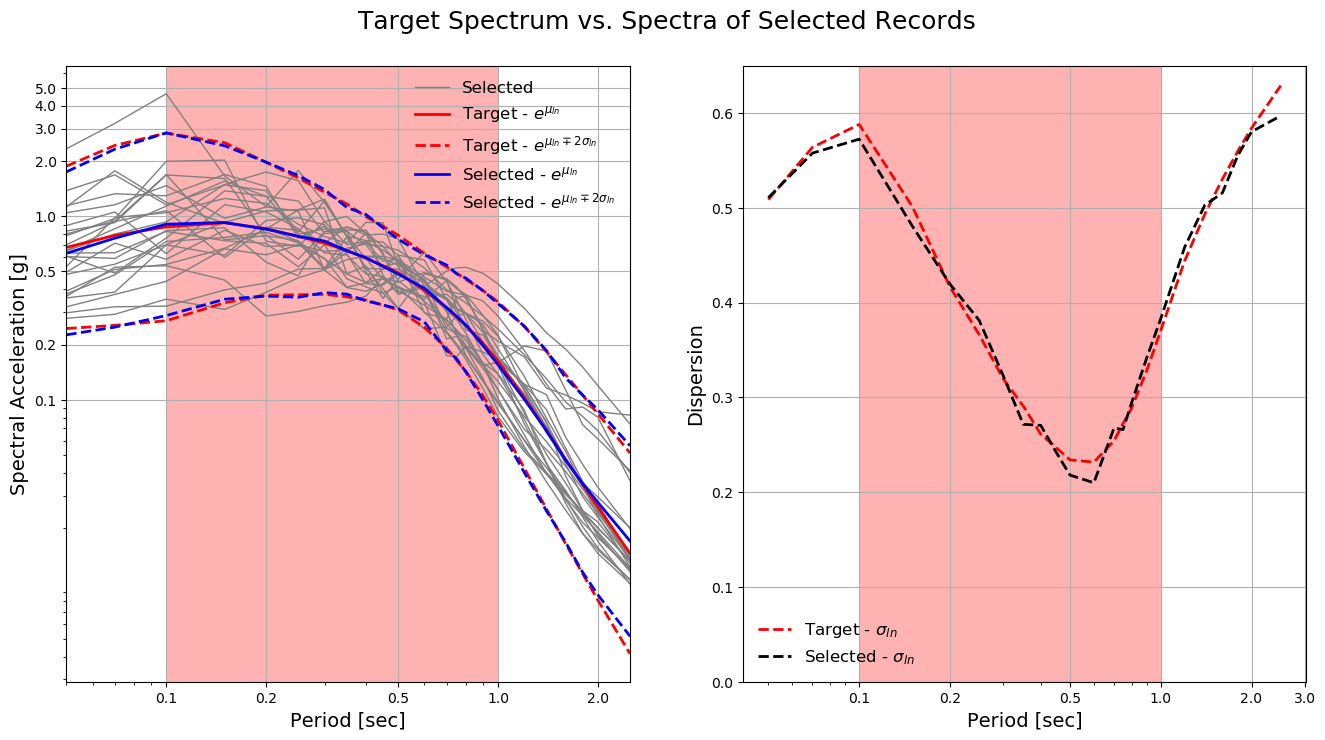


Started executing esm2018_download method...
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.005-in-50-years\unscaled_records_2022_10_21_9_21_44_4_294_0.zip
Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.005-in-50-years
Target spectrum is created.
Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 20.47 %
Max error in standard deviation = 11.78 %


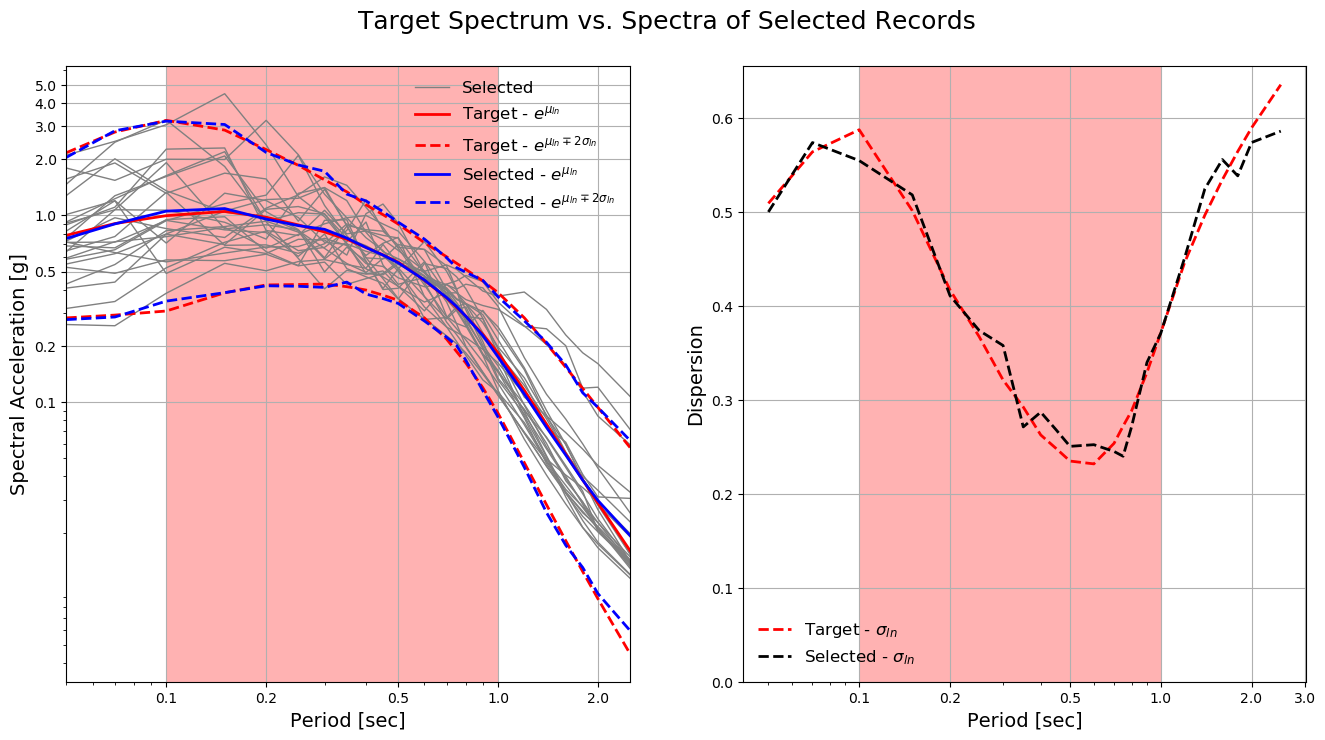


Started executing esm2018_download method...
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.0025-in-50-years\unscaled_records_2022_10_21_9_22_30_4_294_0.zip
Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.0025-in-50-years
Target spectrum is created.
Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 26.75 %
Max error in standard deviation = 12.98 %


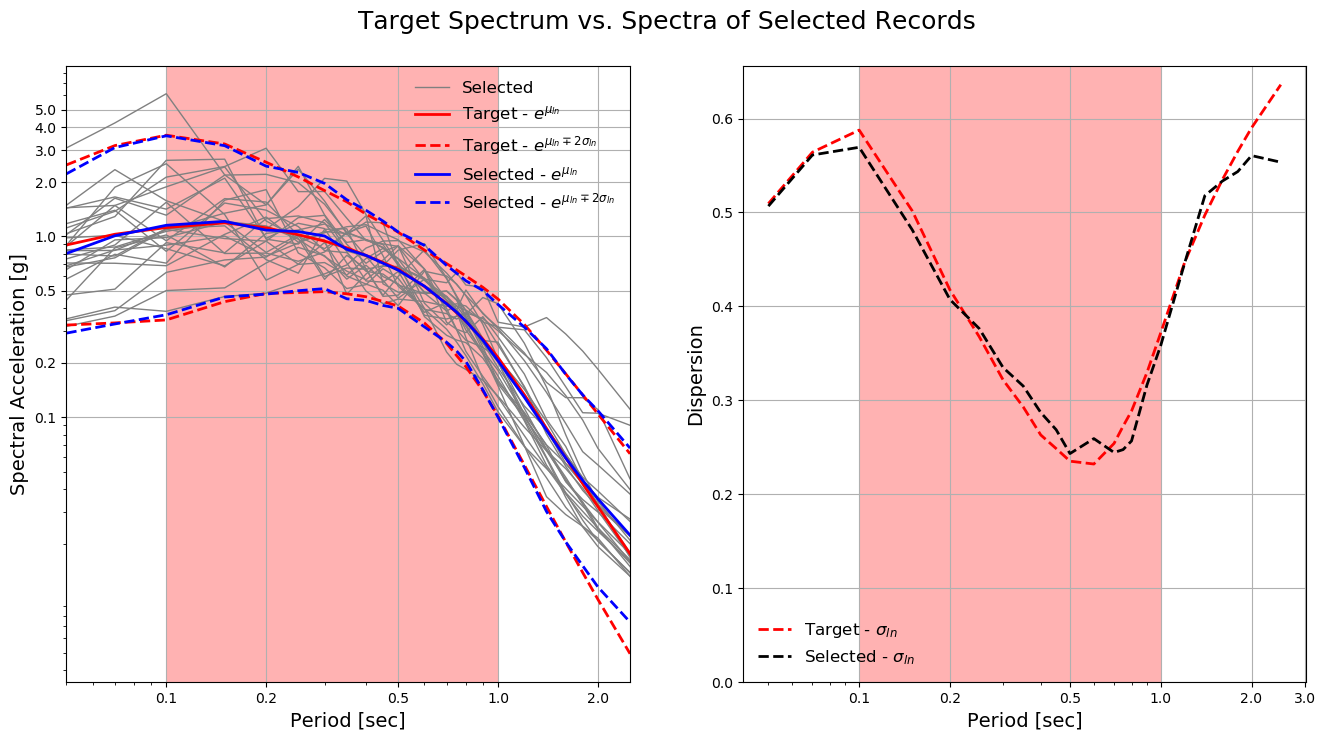


Started executing esm2018_download method...
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.001-in-50-years\unscaled_records_2022_10_21_9_23_14_4_294_0.zip
Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.001-in-50-years


In [5]:
# Get ESM token for ESM database.
get_esm_token('example_username@email.com', pwd = 'example_password123456')

# Check attributes of ground motion prediction equation BooreEtAl2014
check_gmpe_attributes(gmpe='BooreEtAl2014')

ims = []
for file in os.listdir(post_dir):
    if file.startswith('imls'):
        ims.append(file.split('_')[1].split('.')[0])

for im in ims:  # for each im in the im list
    # read hazard and disaggregation info
    imls = np.loadtxt(os.path.join(post_dir, 'imls_' + im + '.out'))
    mean_mags = np.loadtxt(os.path.join(post_dir, 'mean_mags_' + im + '.out'))
    mean_dists = np.loadtxt(os.path.join(post_dir, 'mean_dists_' + im + '.out'))

    for i in range(len(poes)):
        # a) We can use mean magnitude and mean distance values to compute approximate CS.
        mags = [mean_mags[i]]
        dists = [mean_dists[i]]
        hconts = [1.0]
        rakes = [90]
        
        # b) We can also consider all contributing scenarios to compute exact CS.
        disagg = np.loadtxt(os.path.join(post_dir,'MagDist_poe_' + str(poes[i]) + '_' + im + '.out'))
        mags = disagg[:, 0].tolist()
        dists = disagg[:, 1].tolist()
        hconts = disagg[:, 2].tolist()
        rakes = [90]*len(mags)
        
        # 1.) Initialize the conditional_spectrum object for record selection, check which parameters are required for the gmpe you are using.
        cs = conditional_spectrum(database='ESM_2018', outdir=os.path.join('EzGM_Outputs_' + im, 'POE-' + str(poes[i]) + '-in-50-years'))
        
        # 2.) Create target spectrum
        cs.create(Tstar=np.arange(0.1, 1.1, 0.1), gmpe='BooreEtAl2014', selection=1, Sa_def='RotD50',
                  site_param={'vs30': reference_vs30_value}, rup_param={'rake': rakes, 'mag': mags},
                  dist_param={'rjb': dists}, Hcont=None, T_Tgt_range=[0.05, 2.5],
                  im_Tstar=imls[i], epsilon=None, cond=1, useVar=1, corr_func='baker_jayaram')

        # 3.) Select the ground motions
        cs.select(nGM=25, isScaled=1, maxScale=4,
                  Mw_lim=None, Vs30_lim=None, Rjb_lim=None, fault_lim=None, nTrials=20,
                  weights=[1, 2, 0.3], seedValue=0, nLoop=2, penalty=1, tol=10)

        # Plot the target spectrum, simulated spectra and spectra of selected records
        cs.plot(tgt=0, sim=0, rec=1, save=1, show=1)

        # 4.) Download Records
        # cs.ngaw2_download(username = 'example_username@email.com', pwd = 'example_password123456', sleeptime = 2, browser = 'firefox')
        cs.esm2018_download()

        # 5.) If you have records already inside recs_f\database.zip\database or
        # downloaded records for database = NGA_W2 case, write whatever you want,
        # the object itself, selected and scaled time histories
        cs.write(obj=1, recs=1, recs_f='')


In [6]:
# Calculate the total time passed
run_time(start_time)

Run time: 0 hours: 7 minutes: 31.87 seconds
